# McCulloch Pitts Neuron
- This guy was a logician who gave the idea of analogy between neurons in humans to that in AI

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn.datasets
import warnings
warnings.filterwarnings('ignore')

In [3]:
breast_cancer = sklearn.datasets.load_breast_cancer()


In [4]:
X = breast_cancer.data
Y = breast_cancer.target
print(X)
print(Y)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 

In [5]:
data = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)
data['class'] = breast_cancer.target
data.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  class  
0          0.4601                  0.11890      0  
1          0.2750                  0.08902      0  
2          0.3613                  0.08758      0  
3          0.6638                  0.17300      0  
4          0.2364                  0.07678      0  

[5 rows x 31 columns]

In [6]:
data.describe()

mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       mean symmetry  mean fractal dimension  ...  worst texture  \
count     569.000000              569.000000  ...     569.000000   
mean        0.181162                0.062798  ...      25.677223   
std         0.027414                0.007060  ...       6.146258   
min         0.106000                0.049960  ...      12.020000   
25%         0.161900                0.057700  ...      21.080000   
50%         0.179200                0.061540  ...      25.410000   
75%         0.195700                0.066120  ...      29.720000   
max         0.304000                0.097440  ...      49.540000   

       worst perimeter   worst area  worst smoothness  worst compactness  \
count       569.000000   569.000000        569.000000         569.000000   
mean        107.261213   880.583128          0.132369           0.254265   
std          33.602542   569.356993          0.022832           0.157336   
min          50.410000   185.200000          0.071170           0.027290   
25%          84.110000   515.300000          0.116600           0.147200   
50%          97.660000   686.500000          0.131300           0.211900   
75%         125.400000  1084.000000          0.146000           0.339100   
max         251.200000  4254.000000          0.222600           1.058000   

       worst concavity  worst concave points  worst symmetry  \
count       569.000000            569.000000      569.000000   
mean          0.272188              0.114606        0.290076   
std           0.208624              0.065732        0.061867   
min           0.000000              0.000000        0.156500   
25%           0.114500              0.064930        0.250400   
50%           0.226700              0.099930        0.282200   
75%           0.382900              0.161400        0.317900   
max           1.252000              0.291000        0.663800   

       worst fractal dimension       class  
count               569.000000  569.000000  
mean                  0.083946    0.627417  
std                   0.018061    0.483918  
min                   0.055040    0.000000  
25%                   0.071460    0.000000  
50%                   0.080040    1.000000  
75%                   0.092080    1.000000  
max                   0.207500    1.000000  

[8 rows x 31 columns]

In [7]:
data.shape

(569, 31)

In [8]:
data['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [9]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [10]:
data.groupby('class').mean()

mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
class                                                                           
0        17.462830     21.604906      115.365377  978.376415         0.102898   
1        12.146524     17.914762       78.075406  462.790196         0.092478   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
class                                                                         
0              0.145188        0.160775             0.087990       0.192909   
1              0.080085        0.046058             0.025717       0.174186   

       mean fractal dimension  ...  worst radius  worst texture  \
class                          ...                                
0                    0.062680  ...     21.134811      29.318208   
1                    0.062867  ...     13.379801      23.515070   

       worst perimeter   worst area  worst smoothness  worst compactness  \
class                                                                      
0           141.370330  1422.286321          0.144845           0.374824   
1            87.005938   558.899440          0.124959           0.182673   

       worst concavity  worst concave points  worst symmetry  \
class                                                          
0             0.450606              0.182237        0.323468   
1             0.166238              0.074444        0.270246   

       worst fractal dimension  
class                           
0                     0.091530  
1                     0.079442  

[2 rows x 30 columns]

In [11]:
from sklearn.model_selection import train_test_split
X = data.drop('class',axis = 1)
Y = data['class']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.1,random_state=20,stratify=Y)
print(X_train.shape,X_test.shape,X.shape)

(512, 30) (57, 30) (569, 30)


In [12]:
print(Y_train.mean(),Y_test.mean(),Y.mean())

0.626953125 0.631578947368421 0.6274165202108963


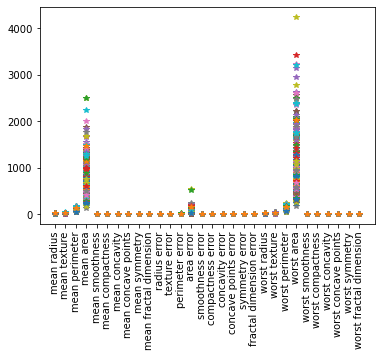

In [13]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

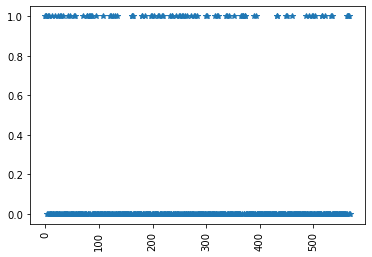

In [14]:
X_binarised_3 = X['mean area'].map(lambda x: 0 if x<1000 else 1)
plt.plot(X_binarised_3,'*')
plt.xticks(rotation='vertical')
plt.show()

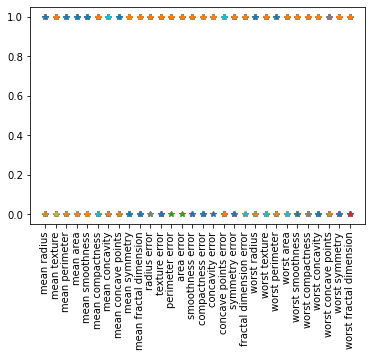

In [15]:
X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[1,0])
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [16]:
X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[1,0])
X_binarised_test.head()

mean radius mean texture mean perimeter mean area mean smoothness  \
29            0            1              0         1               0   
560           1            0              1         1               0   
157           0            1              0         1               1   
391           1            1              1         1               0   
559           1            0              1         1               1   

    mean compactness mean concavity mean concave points mean symmetry  \
29                 1              1                   1             1   
560                1              1                   1             1   
157                1              1                   1             1   
391                1              1                   1             1   
559                1              1                   1             1   

    mean fractal dimension  ... worst radius worst texture worst perimeter  \
29                       1  ...            0             1               0   
560                      1  ...            1             0               1   
157                      1  ...            1             0               1   
391                      1  ...            1             1               1   
559                      1  ...            1             0               1   

    worst area worst smoothness worst compactness worst concavity  \
29           1                1                 1               1   
560          1                1                 1               1   
157          1                1                 1               1   
391          1                0                 1               1   
559          1                1                 1               1   

    worst concave points worst symmetry worst fractal dimension  
29                     0              1                       1  
560                    1              1                       1  
157                    1              1                       1  
391                    1              1                       1  
559                    1              1                       1  

[5 rows x 30 columns]

In [17]:
X_binarised_train = X_binarised_train.values
X_binarised_test = X_binarised_test.values

In [18]:
for b in range(X_binarised_train.shape[1]+1):
    Y_predicted = []
    total_correct_rows = 0
    for x,y in zip(X_binarised_train,Y_train):
        y_pred = (np.sum(x)>=b)
        Y_predicted.append(y_pred)
        total_correct_rows += (y_pred==y)

    accuracy = (total_correct_rows/Y_train.shape[0])
    print("For b = {} accuracy = {}".format(b,accuracy))    



For b = 0 accuracy = 0.626953125
For b = 1 accuracy = 0.626953125
For b = 2 accuracy = 0.626953125
For b = 3 accuracy = 0.626953125
For b = 4 accuracy = 0.626953125
For b = 5 accuracy = 0.626953125
For b = 6 accuracy = 0.626953125
For b = 7 accuracy = 0.626953125
For b = 8 accuracy = 0.626953125
For b = 9 accuracy = 0.626953125
For b = 10 accuracy = 0.626953125
For b = 11 accuracy = 0.626953125
For b = 12 accuracy = 0.62890625
For b = 13 accuracy = 0.630859375
For b = 14 accuracy = 0.634765625
For b = 15 accuracy = 0.63671875
For b = 16 accuracy = 0.64453125
For b = 17 accuracy = 0.65625
For b = 18 accuracy = 0.662109375
For b = 19 accuracy = 0.66796875
For b = 20 accuracy = 0.677734375
For b = 21 accuracy = 0.6953125
For b = 22 accuracy = 0.7109375
For b = 23 accuracy = 0.728515625
For b = 24 accuracy = 0.77734375
For b = 25 accuracy = 0.8046875
For b = 26 accuracy = 0.83984375
For b = 27 accuracy = 0.859375
For b = 28 accuracy = 0.859375
For b = 29 accuracy = 0.81640625
For b = 30 ac

In [19]:
 from sklearn.metrics import accuracy_score
 b=27
 Y_predicted = []
 for x in (X_binarised_test):
    y_pred = (np.sum(x)>=b)
    Y_predicted.append(y_pred)

 accuracy = accuracy_score(Y_predicted,Y_test)
 print(accuracy)

0.8245614035087719


In [20]:
class MPNeuron:

    def __inti__(self):
        self.b =None 
    
    def model(self,x):
        return (np.sum(x)>=self.b)
    
    def predict(self,X):
        Y_pred = []
        for x in X:
            Y_pred.append(self.model(x))
        return (np.array(Y_pred))

    def fit(self,X,Y):
        accuracies = {}
        for b in range(X.shape[0]+1):
            self.b = b
            y_pred = self.predict(X)
            accuracies[b] = accuracy_score(y_pred,Y)
        best_b = max(accuracies,key=accuracies.get)
        self.b = best_b

        print("Optimal Value of parameter b is ",self.b)
        print("Accuracy over training set is ",accuracies[best_b])    




In [21]:
clf = MPNeuron()
clf.fit(X_binarised_train,Y_train)

Optimal Value of parameter b is  27
Accuracy over training set is  0.859375


In [22]:
y_prediction = clf.predict(X_binarised_test)
print(accuracy_score(y_prediction,Y_test))

0.8245614035087719


# Perceptron Model

$ y =1,\mbox{if} \sum_i w_i x_i >= 0  $    
$ y =0, \mbox{otherwise} $

In [50]:
class Perceptron:

    def __init__(self):
        self.w = None
        self.b = None
    
    def model(self,x):
        return (np.dot(self.w,x)+self.b>=0)

    def predict(self,X):
        Y_pred = []
        for x in X:
            result = self.model(x)
            Y_pred.append(result)
        return np.array(Y_pred)

    def fit(self,X,Y,epochs=1,lr=1):
        self.w = np.ones(X.shape[1])
        self.b = 0
        accuracy ={}
        max_accuracy = 0
        for i in range(epochs):
            for x,y in zip(X,Y):
                y_pred = self.model(x)
                if y == 1 and y_pred==0:
                    self.w = self.w+ lr*x
                    self.b = self.b+ lr*1
                elif y==0 and y_pred==1:
                    self.w = self.w - lr*x
                    self.b = self.b - lr*1
            accuracy[i] = accuracy_score(self.predict(X),Y)
            if(accuracy[i]>max_accuracy):
                max_accuracy = accuracy[i]
                checkpt_W = self.w
                checkpt_b = self.b
        self.w = checkpt_W
        self.b = checkpt_b
        print(max_accuracy)
        plt.plot(list(accuracy.values()))
        plt.ylim(0,1)
        plt.show()
        





0.939453125


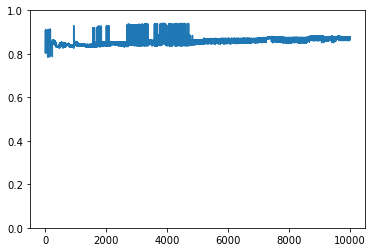

In [55]:
clf2 = Perceptron()
clf2.fit(X_train,Y_train,10000,0.0001)


In [57]:


y_pred = clf2.predict(X_test)
print(accuracy_score(y_pred,Y_test))

0.9298245614035088


# Sigmoid Model

In [3]:
import numpy as np  
def sigmoid(w,b,x):
    z = wx + b
    return (1/(np.exp(-z)+1))


In [13]:
x = np.array((3,4,5,6,8))
y = np.array((0.268,0.73,0.952,0.994,0.999))
res = sigmoid(3,-2,x)
res

array([0.99908895, 0.9999546 , 0.99999774, 0.99999989, 1.        ])

In [15]:
rmse = np.sqrt(np.sum(((res-y)**2))/x.shape[0])
rmse

0.34920117982061655

$S_{w,b}(x) = \frac{1}{1+e^{-(wx+b)}} $

In [8]:
class SigmoidNeuron:

    def __init__(self):
        self.w = None
        self.b = None
    
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_w(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pred = self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)

    def fit(self,X,Y,epochs=1,lr=0.001,intialize=True):

        if intialize:
            self.w = np.random.randn(1,X.shape[1])
            self.b = 0

        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+= self.grad_w(x,y)
                db+= self.grad_b(x,y)
            self.w -= lr*dw
            self.b -= lr*db
    
    def predict(self,X):
        y_pred =[]
        for x in X:
            res = self.sigmoid(self.perceptron(x))
            y_pred.append(res)
        return np.asarray(y_pred)
    


In [6]:
X = np.asarray([[1,2],[3,4],[5,6],[7,8]])
Y = np.asarray([1,1,0,0])

In [12]:
clf = SigmoidNeuron()
clf.fit(X,Y,lr=0.5)
clf.predict(X)

array([[0.49886057],
       [0.14030354],
       [0.02605907],
       [0.00436745]])

In [13]:
clf.w

array([[-1.80785717,  0.90375044]])

In [14]:
clf.b

array([-0.00420145])